Erdem Kuru
Muhammed Kaya
Esra kazi

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import visualkeras

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Displaying A Sample From Dataset

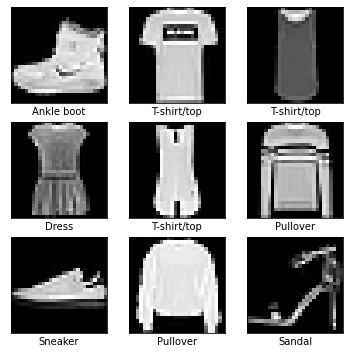

In [2]:
label_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

train_images = train_images/np.float32(255)
test_images = test_images/np.float32(255)

def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_images[i])
    plt.xlabel(label_names[train_labels[i]])
plt.savefig('image_examples.jpg')
plt.show()

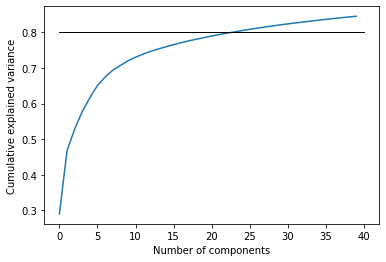

In [3]:
pca = PCA(n_components=40)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

# Training the Single Layered CNN

In [4]:
cnn_train       = train_images_mod.reshape(60000,28,28,1)
cnn_test        = test_images_mod.reshape(10000,28,28,1)
cnn_label_train = to_categorical(train_labels)
cnn_label_test  = to_categorical(test_labels)

cnn_train, cnn_train_val, cnn_label_train, cnn_label_train_val = train_test_split(cnn_train,cnn_label_train, test_size = 0.16, random_state = 2019)

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

cnn_model_training = cnn_model.fit(cnn_train,cnn_label_train,batch_size=64,epochs=25,verbose=1,
                           validation_data=(cnn_train_val,cnn_label_train_val))

Epoch 1/25
788/788 [==============================] - 7s 9ms/step - loss: 0.4018 - accuracy: 0.8574 - val_loss: 0.3196 - val_accuracy: 0.8823
Epoch 2/25
788/788 [==============================] - 7s 9ms/step - loss: 0.2660 - accuracy: 0.9032 - val_loss: 0.3009 - val_accuracy: 0.8903
Epoch 3/25
788/788 [==============================] - 8s 10ms/step - loss: 0.2196 - accuracy: 0.9192 - val_loss: 0.2675 - val_accuracy: 0.9048
Epoch 4/25
788/788 [==============================] - 7s 9ms/step - loss: 0.1840 - accuracy: 0.9329 - val_loss: 0.2659 - val_accuracy: 0.9047
Epoch 5/25
788/788 [==============================] - 7s 9ms/step - loss: 0.1593 - accuracy: 0.9417 - val_loss: 0.2648 - val_accuracy: 0.9111
Epoch 6/25
788/788 [==============================] - 7s 9ms/step - loss: 0.1363 - accuracy: 0.9502 - val_loss: 0.2583 - val_accuracy: 0.9137
Epoch 7/25
788/788 [==============================] - 8s 10ms/step - loss: 0.1160 - accuracy: 0.9572 - val_loss: 0.2789 - val_accuracy: 0.9097
Epoc

# Visualising CNN

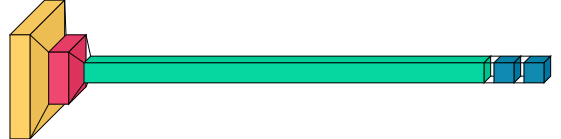

In [5]:
visualkeras.layered_view(cnn_model)

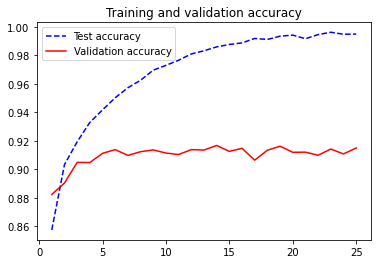

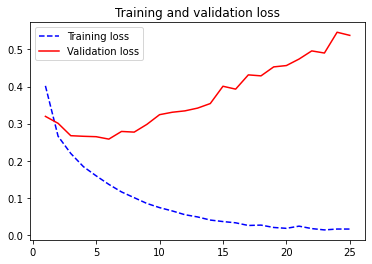

In [6]:
cnn_accuracy     = cnn_model_training.history['accuracy']
cnn_val_accuracy = cnn_model_training.history['val_accuracy']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (1,26)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

In [7]:
accuracy = cnn_model.evaluate(cnn_test,cnn_label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.9121
The accuracy of CNN is equal to : 0.9121000170707703


# Training the Multi-Layered CNN (3 layers)

In [8]:
cnn_multi_train       = train_images_mod.reshape(60000,28,28,1)
cnn_multi_test        = test_images_mod.reshape(10000,28,28,1)
cnn_multi_label_train = to_categorical(train_labels)
cnn_multi_label_test  = to_categorical(test_labels)

cnn_multi_train, cnn_multi_train_val, cnn_multi_label_train, cnn_multi_label_train_val = train_test_split(cnn_multi_train,cnn_multi_label_train, test_size = 0.16, random_state = 2019)

cnn_model_multi = Sequential()
cnn_model_multi.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Flatten())
cnn_model_multi.add(Dense(128,activation = 'relu'))
cnn_model_multi.add(Dense(10,activation='softmax'))
cnn_model_multi.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

cnn_multi_model_training = cnn_model_multi.fit(cnn_train,cnn_label_train,batch_size=64,epochs=25,verbose=1,
                           validation_data=(cnn_multi_train_val,cnn_multi_label_train_val))

Epoch 1/25
788/788 [==============================] - 11s 14ms/step - loss: 0.6077 - accuracy: 0.7795 - val_loss: 0.4704 - val_accuracy: 0.8261
Epoch 2/25
788/788 [==============================] - 11s 14ms/step - loss: 0.4080 - accuracy: 0.8503 - val_loss: 0.3656 - val_accuracy: 0.8675
Epoch 3/25
788/788 [==============================] - 11s 14ms/step - loss: 0.3516 - accuracy: 0.8711 - val_loss: 0.3465 - val_accuracy: 0.8720
Epoch 4/25
788/788 [==============================] - 12s 15ms/step - loss: 0.3165 - accuracy: 0.8852 - val_loss: 0.3248 - val_accuracy: 0.8810
Epoch 5/25
788/788 [==============================] - 11s 15ms/step - loss: 0.2877 - accuracy: 0.8936 - val_loss: 0.3187 - val_accuracy: 0.8818
Epoch 6/25
788/788 [==============================] - 11s 14ms/step - loss: 0.2619 - accuracy: 0.9030 - val_loss: 0.3024 - val_accuracy: 0.8853
Epoch 7/25
788/788 [==============================] - 11s 14ms/step - loss: 0.2444 - accuracy: 0.9096 - val_loss: 0.3297 - val_accuracy:

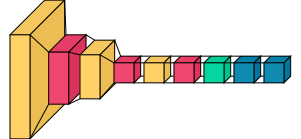

In [10]:
visualkeras.layered_view(cnn_model_multi)

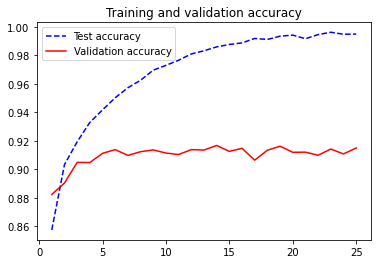

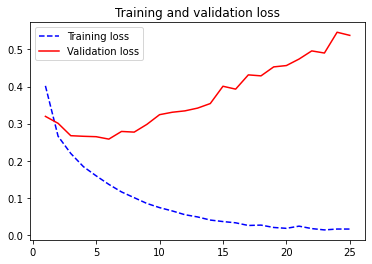

In [11]:
cnn_multi_accuracy     = cnn_multi_model_training.history['accuracy']
cnn_multi_val_accuracy = cnn_multi_model_training.history['val_accuracy']
multi_loss             = cnn_multi_model_training.history['loss'] 
multi_val_loss         = cnn_multi_model_training.history['val_loss']
epochs = [i for i in range (1,26)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

# Logistic Regression Test Accuracy

In [12]:
pipe_log_reg_l2 = Pipeline([('pca',PCA(n_components=25)),('clf',LogisticRegression(multi_class='ovr',penalty='l2',solver='saga'))])
pipe_log_reg_l2.fit(train_images_mod,train_labels)
pred_labels_pipe_log_reg_l2 = pipe_log_reg_l2.predict(test_images_mod)
test_acc_pipe_l2 = accuracy_score(pred_labels_pipe_log_reg_l2,test_labels)
print('Test accuracy of logistic regression on 25 PCs with l2 penalty : ' + str(test_acc_pipe_l2))

C:\Users\Esrak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Esrak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Test accuracy of logistic regression on 25 PCs with l2 penalty : 0.7973


C:\Users\Esrak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# K Nearest Neighbor Test Accuracy

In [20]:
knn_L1 = KNeighborsClassifier(n_neighbors=12,metric='manhattan')
knn_L1.fit(train_images_mod,train_labels)
knn_L1_pred_test_labels    = knn_L1.predict(test_images_mod)
knn_L1_test_acc            = accuracy_score(knn_L1_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L1 metric is equal to :' + str(knn_L1_test_acc))


knn_L2 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
knn_L2.fit(train_images_mod,train_labels)
knn_L2_pred_test_labels    = knn_L2.predict(test_images_mod)
knn_L2_test_acc            = accuracy_score(knn_L2_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L2 metric is equal to :' + str(knn_L2_test_acc))

Test accuracy for 12-nearest neighbors with L1 metric is equal to :0.8568
Test accuracy for 12-nearest neighbors with L2 metric is equal to :0.8471


# Nearest Centroid Test Accuracy

In [14]:
knc_L1 = NearestCentroid(metric='manhattan')
knc_L1.fit(train_images_mod,train_labels)
knc_L1_pred_test_labels = knc_L1.predict(test_images_mod)
knc_L1_test_acc = accuracy_score(knc_L1_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L1_test_acc))


knc_L2 = NearestCentroid(metric='euclidean')
knc_L2.fit(train_images_mod,train_labels)
knc_L2_pred_test_labels = knc_L2.predict(test_images_mod)
knc_L2_test_acc = accuracy_score(knc_L2_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L2_test_acc))

Test accuracy for k-nearest centroids is equal to :0.6567
Test accuracy for k-nearest centroids is equal to :0.6768


# Grid SearchCV  

In [16]:
par_rf = {'rf__n_estimators':[200],'rf__max_features':['sqrt',25],'rf__criterion':['gini','entropy'],
          'rf__max_depth':[5,6],'rf__min_samples_split':[100],'rf__bootstrap':[True]}
pipe_rf = Pipeline([('pca', PCA(n_components=25)),
                    ('rf', RandomForestClassifier())])
rf_grid = GridSearchCV(pipe_rf,cv=5,param_grid=par_rf,refit=False,scoring='accuracy',verbose=3)
rf_grid.fit(train_images_mod,train_labels)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200;, score=0.742 total time=  17.3s
[CV 2/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200;, score=0.731 total time=  18.0s
[CV 3/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200;, score=0.744 total time=  16.8s
[CV 4/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200;, score=0.732 total time=  16.4s
[CV 5/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200;, score=0.746 total time=  16.8s
[CV 1/5] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, 

# Random Forest Test Accuracy

In [17]:
pipe_rf_final = Pipeline([('pca', PCA(n_components=25)),
                        ('rf', RandomForestClassifier(n_estimators=200,bootstrap=True,min_samples_split=100,max_features='sqrt',max_depth=5))])
pipe_rf_final.fit(train_images_mod,train_labels)
new_labels_rf = pipe_rf_final.predict(test_images_mod)
rf_accuracy = accuracy_score(test_labels,new_labels_rf)
print('The accuracy for Random Forest is equal to :' + str(rf_accuracy))

The accuracy for Random Forest is equal to :0.7362


# SVM (Support Vector Machines) Test Accuracy

In [19]:
# SVM with rbf kernel.

pipe_svm_1 = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='rbf',gamma=0.1))])
pipe_svm_1.fit(train_images_mod,train_labels)
pipe_svm_1_pred_labels = pipe_svm_1.predict(test_images_mod)
pipe_svm_1_acc = accuracy_score(pipe_svm_1_pred_labels,test_labels)
print('The accuracy of SVM classifier with rbf kernel is equal to :' + str(pipe_svm_1_acc))

# SVM with polynomial kernel.

pipe_svm_2 = Pipeline([('pca', PCA(n_components=25)),('clf', SVC(C=100,kernel='poly',degree=5))])
pipe_svm_2.fit(test_images_mod,test_labels)
pipe_svm_2_pred_labels = pipe_svm_2.predict(test_images_mod)
pipe_svm_2_acc = accuracy_score(pipe_svm_2_pred_labels,test_labels)
print('The accuracy of SVM classifier with polynomial kernel of degree five is equal to :' + str(pipe_svm_2_acc))

The accuracy of SVM classifier with rbf kernel is equal to :0.864
The accuracy of SVM classifier with polynomial kernel of degree five is equal to :0.9632
